In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras import models

In [ ]:
#load fashin mnist dataset
(training_images, training_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
print(training_images.shape)

#reshape
training_images = training_images.reshape(training_images.shape[0], 28,28,1)
test_images = test_images.reshape(test_images.shape[0], 28,28,1)
print(training_images.shape)


4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000, 28, 28, 1)


Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               20

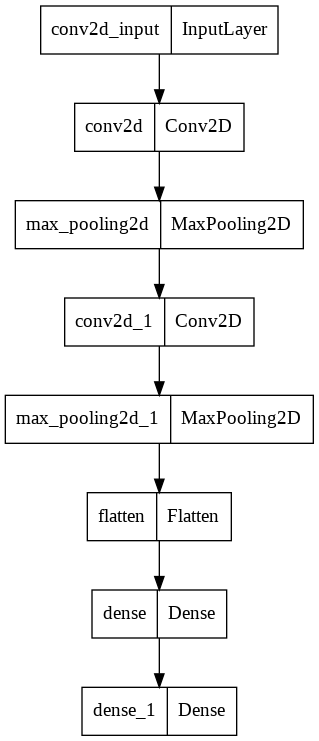

In [ ]:
#define model
def get_model_cnn():
  model_cnn = tf.keras.models.Sequential(name="cnn_model")
  model_cnn.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
  model_cnn.add(keras.layers.MaxPooling2D(2,2))
  model_cnn.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
  model_cnn.add(keras.layers.MaxPooling2D((2,2)))
  model_cnn.add(tf.keras.layers.Flatten())
  model_cnn.add(tf.keras.layers.Dense(128, activation=keras.activations.relu))
  model_cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

  model_cnn.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

  return model_cnn

model_cnn = get_model_cnn()
model_cnn.summary()
plot_model(model_cnn, to_file="model_fc.png")

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir='logs', histogram_freq=1, write_graph=True,
    write_images=True, write_steps_per_second=False, update_freq='epoch'
)

def scheduler(epoch, lr):
  new_lr = lr
  if epoch < 1:
    new_lr = lr
  else:
    new_lr = lr * tf.math.exp(-0.1)

  with tf.summary.create_file_writer('logs/lr').as_default():
    tf.summary.scalar("learning_rate", new_lr, step=epoch)

  return new_lr



lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

checkpoint_filepath = 'checkpoint'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history =model_cnn.fit(training_images, training_labels, epochs=20, validation_data=(test_images, test_labels), callbacks=[tensorboard_callback, lr_callback, model_checkpoint_callback])

Epoch 1/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3080 - accuracy: 0.8863 - val_loss: 0.3295 - val_accuracy: 0.8802 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2714 - accuracy: 0.8985 - val_loss: 0.3040 - val_accuracy: 0.8923 - lr: 9.0484e-04
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2423 - accuracy: 0.9090 - val_loss: 0.3178 - val_accuracy: 0.8963 - lr: 8.1873e-04
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2167 - accuracy: 0.9190 - val_loss: 0.3210 - val_accuracy: 0.8888 - lr: 7.4082e-04
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1912 - accuracy: 0.9276 - val_loss: 0.3281 - val_accuracy: 0.8920 - lr: 6.7032e-04
Epoch 6/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1654 - accuracy: 0.9375 - val_loss: 0.3153 - val_accuracy: 0.9032 - lr: 6.0653e-04
Epoch 7/20
1875/1875 [==========

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir=/content/logs

<IPython.core.display.Javascript object>